In [1]:
import geopandas
from shapely.geometry import Polygon, Point, LineString
import numpy as np

D:\anaconda3\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# Задание 1
Реализуйте функцию get_geodesic_distance, рассчитывающее геодезическое расстояние между двумя точками в километрах.

In [13]:
def get_geodesic_distance(value_1, value_2):
    latitude_1 = value_1.x * np.pi / 180
    latitude_2 = value_2.x * np.pi / 180 
    longitude_1 = value_1.y * np.pi / 180 
    longitude_2 = value_2.y * np.pi / 180 
    r = 6371 
    distance = 2 * r * np.arcsin(np.sqrt((np.sin((latitude_2 - latitude_1)/2))**2 +np.cos(latitude_1) * np.cos(latitude_2) *(np.sin((longitude_2 - longitude_1) / 2))**2))
    return distance

In [14]:

mipt = Point(55.9297243, 37.5199434) 
kremlin = Point(55.752023, 37.6174994)

get_geodesic_distance(mipt, kremlin)

20.67695199578302

# Задание 2
Реализуйте функцию get_k_nearest_neighbours_by_dist, осуществляющую поиск k ближайших соседей полигона из заданного списка на основе геодезического расстояния. Добавьте две возможности учета расстояния: через ближайшие точки на границах полигонов и через центроиды полигонов.

In [15]:
import pandas as pd
import geopandas as gpd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from shapely.ops import nearest_points

In [21]:
def get_k_nearest_neighbours_by_dist(polygon, polygons, k, kind): #через ближайшие точки на границах полигонов 
    gs = gpd.GeoSeries(polygons)
    res_df = pd.DataFrame(gs, columns=['geometry'])
    dist = []
    if kind == 'by_centroid':
        main_centroid = gpd.GeoSeries(polygon).centroid
        for point in gs.centroid:
            dist.append(float(get_geodesic_distance(main_centroid, point)))
            
    if kind == 'by_board':
        for pol in polygons:
            point_1, point_2 = gpd.GeoSeries(nearest_points(polygon, pol))
            dist.append(float(get_geodesic_distance(point_1, point_2)))
    
    res_df.insert(0, 'dist', dist)
    res_df.sort_values('dist', inplace=True)
    return gpd.GeoSeries(res_df['geometry'][:10])

<AxesSubplot:>

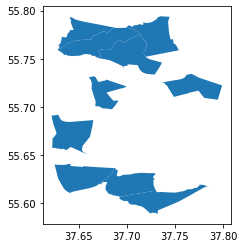

In [22]:
# Сигнатура функции и пример вывода:

big_moscow_districts = gpd.read_file(r'C:\Users\User\Downloads\sberbank_data_analysis-master\sberbank_data_analysis-master\data\big_moscow_disticts\big_moscow_districts.shp')
polygon = random.sample(big_moscow_districts['geometry'].tolist(), 1)[0]
polygons = random.sample(big_moscow_districts['geometry'].tolist(), 50)

k_nearest_neighbours_by_board = get_k_nearest_neighbours_by_dist(polygon, polygons, k=10, kind='by_board')
k_nearest_neighbours_by_centroid = get_k_nearest_neighbours_by_dist(polygon, polygons, k=10, kind='by_centroid')
k_nearest_neighbours_by_centroid.plot()

In [29]:
big_moscow_districts = gpd.read_file(r'C:\Users\User\Downloads\sberbank_data_analysis-master\sberbank_data_analysis-master\data\big_moscow_disticts\big_moscow_districts.shp')
polygon = random.sample(big_moscow_districts['geometry'].tolist(), 1)[0]
polygons = random.sample(big_moscow_districts['geometry'].tolist(), 50)

k_nearest_neighbours_by_board = get_k_nearest_neighbours_by_dist(polygon, polygons, k=10, kind='by_board')
k_nearest_neighbours_by_centroid = get_k_nearest_neighbours_by_dist(polygon, polygons, k=10, kind='by_centroid')

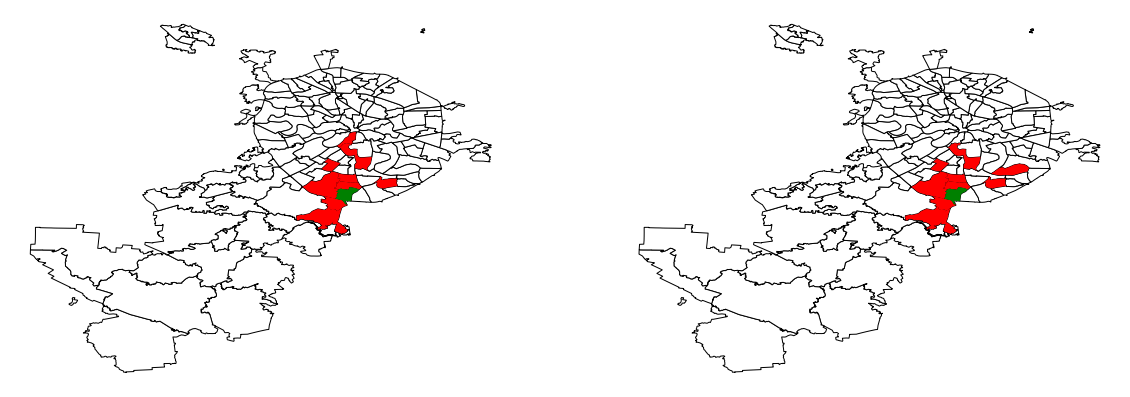

In [30]:
fig = plt.figure(figsize=(20, 10))

ax = plt.subplot(1, 2, 1)
big_moscow_districts.plot(ax=ax, color='white', edgecolor='black')
k_nearest_neighbours_by_centroid.plot(ax=ax, color='red')
gpd.GeoSeries(polygon).plot(ax=ax, color='green')
ax.set_axis_off()

ax = plt.subplot(1, 2, 2)
big_moscow_districts.plot(ax=ax, color='white', edgecolor='black')
k_nearest_neighbours_by_board.plot(ax=ax, color='red')
gpd.GeoSeries(polygon).plot(ax=ax, color='green')
ax.set_axis_off()

### Упражнение 4
* Отобразите результаты упражнений 2 и 3 (рисунки с `###`) на интерактивной карте в `Folium`

In [25]:
import folium
from folium.features import DivIcon
import geopy 
from geopy.geocoders import Yandex, GoogleV3


In [26]:
from geopandas import GeoDataFrame

KNN_by_c = GeoDataFrame(k_nearest_neighbours_by_centroid, crs='EPSG:4326')
KNN_by_b = GeoDataFrame(k_nearest_neighbours_by_board, crs='EPSG:4326')

In [27]:
m = folium.Map(location=[55.755826, 37.6172999],zoom_start=9)
m.choropleth(big_moscow_districts, fill_color='white')
m.choropleth(KNN_by_c, fill_color='red')
m.choropleth(polygon, fill_color='green')

m

D:\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
